In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
################################################
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
################################################
from scipy.spatial.distance import cdist
################################################
%matplotlib inline
################################################

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter04/Datasets/Clothing_Customers.csv')

In [8]:
df.head()

,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


In [2]:
# takes the inputs of raw df and the list of columns that you want to scale
def getScaledData(df, cols_to_scale):
    scaler = StandardScaler()
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
    return df

In [3]:
# get the elbow chart for the different number of n_clusters, takes the scaled dataframe columns 
# (which is also a dataframe), and the list of columns that you want to be clusters
def getElbowChart(df_scaled, cluster_cols):  
    X = df_scaled[cluster_cols]
    inertia_scores = []
    for K in range(2,11):
        inertia = KMeans(n_clusters=K, random_state=42).fit(X).inertia_
        inertia_scores.append(inertia)
    plt.figure(figsize=[7,5])
    plt.plot(range(2,11), inertia_scores, color='gray')
    plt.title("SSE/Inertia vs Number of clusters")
    plt.xlabel("Number of clusters: K")
    plt.ylabel('SSE/Inertia')
    plt.show()

In [12]:

def getReducedDimensions(df_scaled, n_components, cols_to_scale):
    pca = PCA(n_components=n_components)
    pca_res = pca.fit_transform(df_scaled[cols_to_scale])
    for i in range(0, n_components):
        df_scaled[f'pc{i+1}'] = pca_res[:, i]
    return df_scaled


In [13]:
def getClusterChart(df_scaled, cluster_cols):   
    markers = ['x', '*', '.', '|', '_', '1', '2'] 
    plt.figure(figsize=[20,12])
    for n in range(2,8):
        model = KMeans(n_clusters=n, random_state=42)
        df_scaled['Cluster']= model.fit_predict(df_scaled[cluster_cols])
        plt.subplot(2,3, n-1)
        for clust in range(n):
            temp = df_scaled[df_scaled.Cluster == clust]
            plt.scatter(temp.pc1, temp.pc2,            
            marker=markers[clust], label="Cluster "+str(clust), color='gray')
            plt.title("N clusters: "+str(n))
            plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.legend()
    plt.show()

In [14]:
# get the elbow chart for the different number of n_clusters, takes the scaled dataframe columns 
# (which is also a dataframe), and the list of columns that you want to be clusters
def getElbowChart(df_scaled, cluster_cols):  
    X = df_scaled[cluster_cols]
    inertia_scores = []
    for K in range(2,11):
        inertia = KMeans(n_clusters=K, random_state=42).fit(X).inertia_
        inertia_scores.append(inertia)
    plt.figure(figsize=[7,5])
    plt.plot(range(2,11), inertia_scores, color='gray')
    plt.title("SSE/Inertia vs. number of clusters")
    plt.xlabel("Number of clusters: K")
    plt.ylabel('SSE/Inertia')
    plt.show()

In [9]:
cols_to_scale = ['income','age','days_since_purchase','annual_spend']
df_scaled = getScaledData(df, cols_to_scale)
df_scaled

,income,age,days_since_purchase,annual_spend
0,-0.890426,0.604861,0.753257,0.062276
1,-0.553094,0.789354,1.306361,-0.058939
2,-0.039778,-0.040865,-0.834688,0.898182
3,-0.516023,0.973847,-1.432398,0.671353
4,1.005897,-1.332317,-1.253977,-1.553129
...,...,...,...,...
995,-0.864624,1.250586,-1.245056,0.512333
996,-1.739986,-0.963331,0.093100,-0.600808
997,0.246861,-0.040865,0.467784,1.211421
998,0.035123,1.250586,0.672967,0.897582


In [15]:
df_scaled_reduced = getReducedDimensions(df_scaled, 2, cols_to_scale)
df_scaled_reduced

,income,age,days_since_purchase,annual_spend,pc1,pc2
0,-0.890426,0.604861,0.753257,0.062276,-0.855025,0.935161
1,-0.553094,0.789354,1.306361,-0.058939,-0.963841,1.047314
2,-0.039778,-0.040865,-0.834688,0.898182,-0.350945,-0.742276
3,-0.516023,0.973847,-1.432398,0.671353,-0.833541,-0.960941
4,1.005897,-1.332317,-1.253977,-1.553129,2.476828,-0.755844
...,...,...,...,...,...,...
995,-0.864624,1.250586,-1.245056,0.512333,-1.046184,-0.621332
996,-1.739986,-0.963331,0.093100,-0.600808,0.595203,1.634391
997,0.246861,-0.040865,0.467784,1.211421,-0.831869,-0.198318
998,0.035123,1.250586,0.672967,0.897582,-1.590470,-0.126529


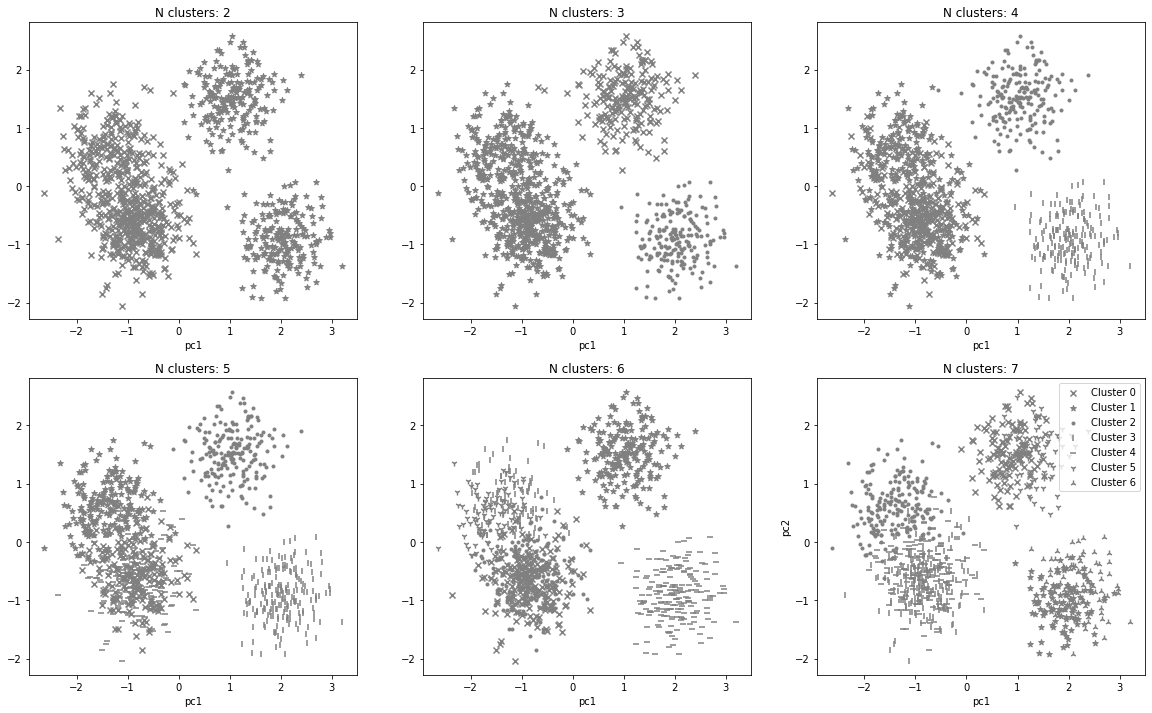

In [18]:
getClusterChart(df_scaled_reduced, ['income','age','days_since_purchase', 'annual_spend'])